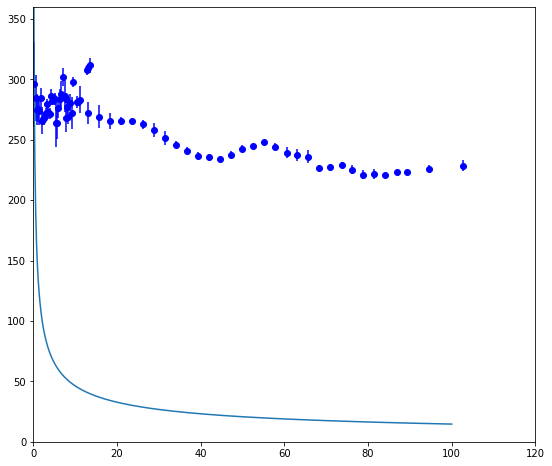

In [1]:
#Hello to anyone viewing this
#1. can't yet figure out how to use the blackhole equation from the library (Kitty?)
#2. disabling warnings is rather necessary, screen twitches horribly otherwise

%matplotlib inline
from ipywidgets import interactive
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp
import scipy.interpolate as inter

from datetime import datetime
import scipy.integrate as si
import noordermeer as noord
import time as t
import warnings
warnings.filterwarnings("ignore")  #ignore warnings

data = dp.getXYdata_wXYerr('data/final/nord-120kpc-datapoints.txt')
data_total = dp.getXYdata('data/final/nord-120kpc-total.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

G = 4.30091e-6  
def f(M):
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    #plt.show()
    
    plt.figure(figsize=(9.0,8.0))
    plt.xlim(0,120)
    plt.ylim(0,360)
    rval = np.linspace(0,100,1000)
    plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
    #plt.plot(rval,np.sqrt(G*M/rval)) #manual
    plt.plot(rval,nf.bh_v(rval,M)) #library

interactive_plot = interactive(f, M=(0, 10e9,1e9),continuous_update=False)
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot